## Sequence Identity vs. TM-score Analysis for AIPD TEVV (Ikonomova et al.)
Plots relationship between number of AIPD sequence substitutions and TM-score versus wildtype. TM-score is the mean of 200 OpenFold generated models compared to models of the wildtype sequence.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

In [2]:
df = pd.read_csv('../data/selected_sequences.csv')[['selected_name', 'protein', 'sequence', 'seqid', 'tm_mean', 'dplddt_mean', 'norm']]

In [3]:
# Select protein target to perform analysis
PROTEIN = 'PDZ3'

In [4]:
# Defines protein target IDs and wildtype sequences
prot_dict = {
    "PDZ3": {
        "csv_identifier": "psd95pdz3",
        "wt_seq": "PRRIVIHRGSTGLGFNIVGGEDGEGIFISFILAGGPADLSGELRKGDQILSVNGVDLRNASHEQAAIALKNAGQTVTIIAQYKP"
        },
    "URA3": {
        "csv_identifier": "ura3",
        "wt_seq": "MSKATYKERAATHPSPVAAKLFNIMHEKQTNLCASLDVRTTKELLELVEALGPKICLLKTHVDILTDFSMEGTVKPLKALSAKYNFLLFEDRKFADIGNTVKLQYSAGVYRIAEWADITNAHGVVGPGIVSGLKQAAEEVTKEPRGLLMLAELSCKGSLATGEYTKGTVDIAKSDKDFVIGFIAQRDMGGRDEGYDWLIMTPGVGLDDKGDALGQQYRTVDDVVSTGSDIIIVGRGLFAKGRDAKVEGERYRKAGWEAYLRRCGQQN"
        },
    "T7 RNAP": {
        "csv_identifier": "t7rnapol",
        "wt_seq": "MNTINIAKNDFSDIELAAIPFNTLADHYGERLAREQLALEHESYEMGEARFRKMFERQLKAGEVADNAAAKPLITTLLPKMIARINDWFEEVKAKRGKRPTAFQFLQEIKPEAVAYITIKTTLACLTSADNTTVQAVASAIGRAIEDEARFGRIRDLEAKHFKKNVEEQLNKRVGHVYKKAFMQVVEADMLSKGLLGGEAWSSWHKEDSIHVGVRCIEMLIESTGMVSLHRQNAGVVGQDSETIELAPEYAEAIATRAGALAGISPMFQPCVVPPKPWTGITGGGYWANGRRPLALVRTHSKKALMRYEDVYMPEVYKAINIAQNTAWKINKKVLAVANVITKWKHCPVEDIPAIEREELPMKPEDIDMNPEALTAWKRAAAAVYRKDKARKSRRISLEFMLEQANKFANHKAIWFPYNMDWRGRVYAVSMFNPQGNDMTKGLLTLAKGKPIGKEGYYWLKIHGANCAGVDKVPFPERIKFIEENHENIMACAKSPLENTWWAEQDSPFCFLAFCFEYAGVQHHGLSYNCSLPLAFDGSCSGIQHFSAMLRDEVGGRAVNLLPSETVQDIYGIVAKKVNEILQADAINGTDNEVVTVTDENTGEISEKVKLGTKALAGQWLAYGVTRSVTKRSVMTLAYGSKEFGFRQQVLEDTIQPAIDSGKGLMFTQPNQAAGYMAKLIWESVSVTVVAAVEAMNWLKSAAKLLAAEVKDKKTGEILRKRCAVHWVTPDGFPVWQEYKKPIQTRLNLMFLGQFRLQPTINTNKDSEIDAHKQESGIAPNFVHSQDGSHLRKTVVWAHEKYGIESFALIHDSFGTIPADAANLFKAVRETMVDTYESCDVLADFYDQFADQLHESQLDKMPALPAKGNLNLRDILESDFAFA"
        },
}

In [5]:
protein_df = df[df['protein'] == prot_dict[PROTEIN]['csv_identifier']]
wt_seq = prot_dict[PROTEIN]['wt_seq']

In [6]:
def count_mutations(seq, ref='ref'):
    """
    Counts the number of differences between two strings.

    Args:
        seq: The sequence to count.
        ref: The reference sequence.

    Returns:
        The number of differences between the two strings.
        Returns -1 if the strings are of different lengths.
    """

    if len(seq) != len(ref):
        return -1

    differences = 0
    for i in range(len(seq)):
        if seq[i] != ref[i]:
            differences += 1
    return differences

def coloring(value, threshold):
    if value >= threshold:
        return 'blue'
    else:
        return 'grey'

In [7]:
# Count mutations from wt
protein_df['n_mutations'] = protein_df['sequence'].apply(count_mutations, args=(wt_seq,))

/var/folders/kv/drkyrlls1gjbt2hggx0nyrb40023dp/T/ipykernel_49074/3818739809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protein_df['n_mutations'] = protein_df['sequence'].apply(count_mutations, args=(wt_seq,))


### Plotting
Note: adjust `tm_threshold` to separate linear region of graph (ie, if points show linearity when TM-score ≥ 0.5, set `tm_threshold` = 0.5 for labeling and regression).

Slope: -0.0011466376773861336
Intercept: 1.0160062120439624
R² Score: 0.6824664014555953
RMSE: 0.01530363584588939


/var/folders/kv/drkyrlls1gjbt2hggx0nyrb40023dp/T/ipykernel_49074/2720407231.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['color'] = plot_df['tm_mean'].apply(coloring, args=(tm_threshold,))


Text(0.5, 0, 'Sequence substitutions from wildtype')

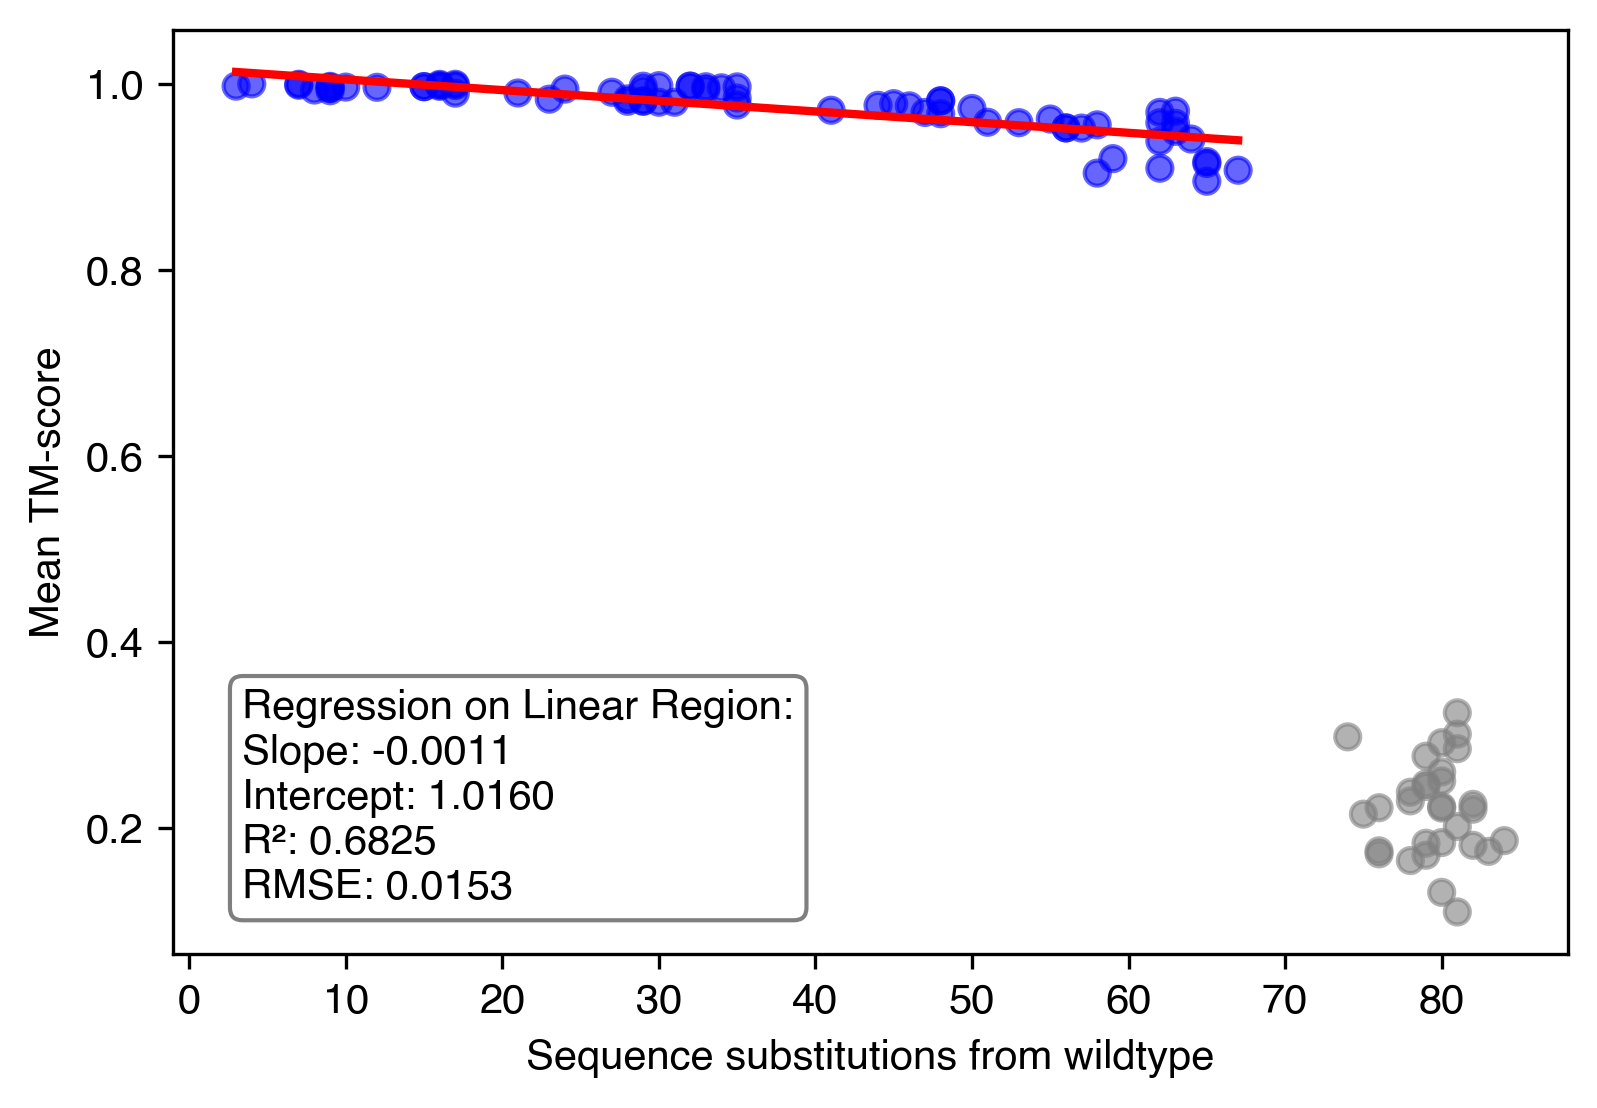

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


plt.rcParams['figure.dpi'] = 300
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=True)

## Manually defines y-axis cutoff for apparent linear region of x-y relationship
tm_threshold = 0.6

font = {'fontname':'Helvetica'}

plot_df = protein_df
plot_df['color'] = plot_df['tm_mean'].apply(coloring, args=(tm_threshold,))

# Separate linear/nonlinear regions of graph based on manually defined cutoff
cluster = protein_df[protein_df['tm_mean'] >= tm_threshold]

# Fit a linear regression
X = cluster['n_mutations'].values.reshape(-1, 1)
y = cluster['tm_mean'].values
model = LinearRegression()
model.fit(X, y)

# Calculate goodness of fit metrics
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print the model parameters
print(f"Slope: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

# Plot the original data and the regression line
plt.figure(figsize=(6, 4))

plt.scatter(
    x = plot_df['n_mutations'],
    y = plot_df['tm_mean'],
    c=plot_df['color'],
    alpha=0.6
)

# Generate points for the regression line
x_line = np.array([min(cluster['n_mutations']), max(cluster['n_mutations'])])
y_line = model.predict(x_line.reshape(-1, 1))

# Plot the regression line
plt.plot(x_line, y_line, color='red', linewidth=2)

# Add text box with model metrics
textstr = '\n'.join((
    'Regression on linear region:',
    f'Slope: {model.coef_[0]:.4f}',
    f'Intercept: {model.intercept_:.4f}',
    f'R²: {r2:.4f}',
    f'RMSE: {rmse:.4f}'))

# Place the text box in the lower left corner of the plot
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.05, 0.05, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='bottom', bbox=props)

plt.ylabel('Mean TM-score')
plt.xlabel('Sequence substitutions from wildtype')
#plt.title(f'{PROTEIN} Substitution Count vs. Mean TM-score')
